Практикум по статистическим тестам

Автор: **Булыгин Олег**
* [Я в LinkedIn](https://www.linkedin.com/in/obulygin/)  
* [Мой канал в ТГ по Python](https://t.me/pythontalk_ru)
* [Чат канала](https://t.me/pythontalk_chat)
* [Блог в Телетайпе](https://teletype.in/@pythontalk)

In [ ]:
import numpy as np
import scipy.stats as st
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

Никакие экспериментально полученные данные никогда **не подтвердят** какую-либо гипотезу. Это является фундаментальным ограничением. Данные могут лишь не противоречить гипотезе или, наоборот, показывать очень маловероятные результаты (при условии, что гипотеза верна). Но и в том, и в другом случае никогда нет оснований утверждать, что выдвинутая гипотеза **доказана**.

1) Нужно сформулировать нулевую и альтернативную гипотезы;   
2) Определить пороговый уровень статистической значимости;  
3) Сколько у нас выборок (какой вариант теста используем)?  
3) Нужен ли односторонний, либо двухсторонний вариант теста?  https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/  
4) Выборки связаны или нет?

## Параметрические тесты
### Тест Стьюдента для независмых выборок

Проверка среднего значения двух выборок или одной выборки с целевым значением

Допущения

* Наблюдения внутри каждой выборки независимы друг от друга.
* Есть распространённое мнение, что данный тест требует нормального распределения, но это не совсем так. Если данных не мало, то требуется нормальное распределение выборочных средних, которое соблюдается почти всегда (кроме распределения Коши).
* Одинаковая вариация в выборках.

Гипотеза

* H0: Средние выборок одинаковы / Средние выборки совпадает с целевым значением
* H1: Средние выборок различаются / Средние выборки отличается от целевого значения

#### Одновыборочный тест

<b>Пример.</b> Тест покажет нам, отличаются ли средние значения выборки и генеральной совокупности (сравниваем с генеральной!). Рассмотрим некоторое количество голосующих из Индии и население всего Мира. Отличается ли средний возраст избирателей Индии от возраста населения? Сейчас выясним!

In [ ]:
np.random.seed(42)

population_ages1=st.norm.rvs(loc=20, scale=45, size=15000)
population_ages2=st.norm.rvs(loc=20, scale=10, size=10000)
population_ages=np.concatenate((population_ages1, population_ages2))  # Сгенерировали всю популяцию.

india_ages1=st.norm.rvs(loc=19, scale=65, size=2000)  # Индия 1
india_ages2=st.norm.rvs(loc=19, scale=55, size=2000)
india_ages=np.concatenate((india_ages1, india_ages2)) #Выборка
print('Средний возраст всего мира', population_ages.mean())
print('Средний возраст индусов', india_ages.mean())

Средний возраст всего мира 20.05285494883601
Средний возраст индусов 18.637370653568478


In [ ]:
stat, p = st.ttest_1samp(a=india_ages, popmean=population_ages.mean())
print(f"Статистика = {stat:.3f}, p = {p:.3f}")

if p > 0.05:
    print("Не отклоняем нулевую гипотезу, средний возраст в Индии, вероятно, не отличается от среднего по миру")
else:
    print("Отклоняем нулевую гипотезу, средний возраст в Индии, вероятно, отличается от среднего по миру")

Статистика = -1.494, p = 0.135
Не отклоняем нулевую гипотезу, средний возраст в Индии, вероятно, не отличается от среднего по миру


(array([  3.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,   2.,   2.,   2.,
          2.,   2.,   5.,   4.,   4.,   3.,   5.,   8.,  10.,   9.,  13.,
          8.,   8.,  16.,  18.,  15.,  11.,  22.,  18.,  31.,  27.,  34.,
         28.,  49.,  49.,  37.,  49.,  61.,  56.,  57.,  56.,  69.,  60.,
         65.,  70.,  74.,  74.,  62.,  80.,  67.,  73., 102.,  94.,  72.,
         99.,  91.,  98.,  93.,  80., 106.,  99.,  77.,  80.,  92.,  63.,
         76.,  93.,  81.,  73.,  73.,  76.,  75.,  55.,  61.,  49.,  52.,
         40.,  47.,  48.,  39.,  32.,  37.,  33.,  22.,  25.,  24.,  27.,
         13.,  23.,   8.,  23.,  17.,  13.,  15.,  13.,   8.,   6.,   5.,
          5.,   8.,   2.,   6.,   4.,   1.,   7.,   4.,   3.,   2.,   4.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   2.,   1.]),
 array([-179.59566651, -176.1990416 , -172.80241669, -169.40579178,
        -166.00916687, -162.61254196, -159.21591705, -155.81929214,
        -152.42266723, -149.02604232, -145.62941741, -

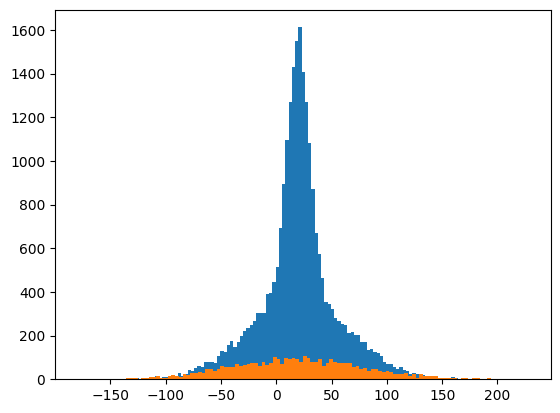

In [ ]:
plt.hist(population_ages, bins=120)
plt.hist(india_ages, bins=120)

#### Тест для двух выборок

<b>Пример.</b> Такой тест показывает, имеют ли две выборки разные средние значения. Здесь нулевая гипотеза заключается в том, что обе группы имеют равные средние.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/netology_pyda_files/main/apple_samsung.csv')
df

,Sr No,S_Cust_id,Samsung_Score,Apple_Cust_id,Apple_Score
0,1,S336499,94,A336525,82
1,2,S73004,99,A73011,83
2,3,S79537,74,A79538,88
3,4,S769168,74,A769222,80
4,5,S609791,83,A609801,74
...,...,...,...,...,...
95,96,S285617,77,A285629,87
96,97,S324135,85,A324151,82
97,98,S292076,83,A292091,88
98,99,S936528,82,A936566,91


In [ ]:
stat, p = st.ttest_ind(df['Samsung_Score'], df['Apple_Score'])
print(df['Samsung_Score'].mean())
print(df['Apple_Score'].mean())
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if (p < 0.05):
    print('Отвергаем нулевую гипотезу, клиенты по разному относятся к продукции Apple и Samsung')
else:
    print('Не отвергаем нулевую гипотезу')

84.9
87.81
Статистика = -1.90643, p = 0.05804
Не отвергаем нулевую гипотезу


По умолчанию критерий Стьюдента подразумевает равенство дисперсий двух выборок. Если дисперсии отличаются (можно проверить с помощью F-теста), то нужно использовать поправку Уэлча (Welch). В scipy это реализовано через параметр функции ttest_ind: `equal_var = False`.

Существует [мнение](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html), что использование критерия Уэлча всегда предпочтительнее, будем придерживаться этой позиции.

In [ ]:
stat, p = st.ttest_ind(df['Samsung_Score'], df['Apple_Score'], equal_var=False)
print(df['Samsung_Score'].mean())
print(df['Apple_Score'].mean())
print(f"Статистика = {stat:.5f}, p = {p:.5f}")
if (p < 0.05):
    print('Отвергаем нулевую гипотезу, клиенты по разному относятся к продукции Apple и Samsung')
else:
    print('Не отвергаем нулевую гипотезу')

84.9
87.81
Статистика = -1.90643, p = 0.05810
Не отвергаем нулевую гипотезу


(array([ 1.,  1.,  0.,  1.,  2.,  2.,  3.,  2.,  0.,  1.,  3.,  5.,  2.,
         8.,  4.,  6.,  3., 13.,  2.,  7.,  2.,  7.,  2.,  2., 21.]),
 array([ 62.  ,  63.52,  65.04,  66.56,  68.08,  69.6 ,  71.12,  72.64,
         74.16,  75.68,  77.2 ,  78.72,  80.24,  81.76,  83.28,  84.8 ,
         86.32,  87.84,  89.36,  90.88,  92.4 ,  93.92,  95.44,  96.96,
         98.48, 100.  ]),
 <BarContainer object of 25 artists>)

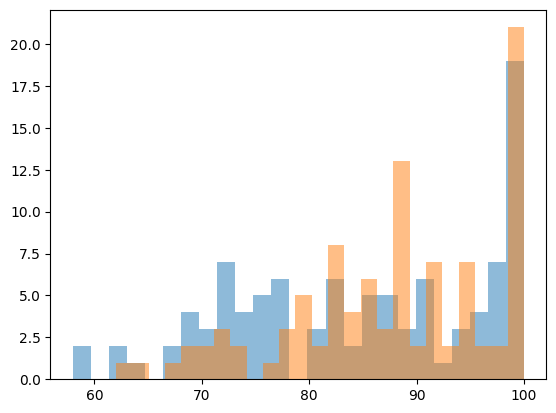

In [ ]:
plt.hist(df['Samsung_Score'], bins=25, alpha=0.5)
plt.hist(df['Apple_Score'], bins=25, alpha=0.5)

### Тест Стьюдента для зависимых выборок
Сравнивает средние значения при связанных данных, когда измерения проводились, например, до и после каких-то изменений.

Допущения
* Одинаковая вариация в выборках.
* Наблюдения связаны попарно в двух выборках

Гипотеза

* H0: Средние выборок одинаковы.
* H1: Средние выборок различаются.

<b>Пример.</b> Предположим, нас интересует оценка эффективности программы обучения компании. Один из подходов, который вы можете рассмотреть, - это измерение производительности выборки сотрудников до и после завершения программы и анализ различий с использованием парного выборочного t-критерия.

In [ ]:
np.random.seed(54)

before = st.norm.rvs(scale = 30, loc = 250, size = 100)
after = before + st.norm.rvs(scale = 5, loc = -.273, size = 100)
weight_df = pd.DataFrame({"вес_до":before,
                         "вес_после":after,
                         "вес_изменение":after-before})
weight_df.describe()

,вес_до,вес_после,вес_изменение
count,100.000000,100.000000,100.000000
mean,246.691328,246.800651,0.109323
std,28.161039,28.746787,5.153353
min,192.332479,189.122861,-12.533319
25%,228.405828,225.747076,-2.846210
50%,245.169221,244.712994,-0.115017
75%,268.328626,266.582395,3.782396
max,325.254027,319.269443,11.587162


In [ ]:
stat, p = st.ttest_rel(a=before, b=after)

print(f"Статистика = {stat:.3f}, p = {p:.3f}")
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются')

Статистика = -0.212, p = 0.832
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


### А если распределение не нормальное?
В этом случае можно использовать непараметрические тесты или преобразования данных. С преобразованиями данных нужно быть аккуратнее, так как после преобразования меняется масштаб данных и единицы измерения, что может затруднять интерпретацию.

## Непараметрические тесты
### Тест Манна-Уитни
Критерий Манна-Уитни представляет непараметрическую альтернативу критерия Стьюдента для независимых выборок и используется для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно.

Допущения

* Наблюдения внутри каждой выборки независимы друг от друга.
* Наблюдения можно проранжировать.

Гипотеза

* H0: Распределения одинаковы.
* H1: Распределения различаются.

In [ ]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

stat, p = st.mannwhitneyu(data1, data2)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 40.00000, p = 0.47268
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


### Тест Вилкоксона
Тест Вилкоксона - это непараметрический аналог парного критерия Стьюдента.

Допущения

* Наблюдения внутри каждой выборки независимы друг от друга.
* Наблюдения можно проранжировать.
* Наблюдения связаны попарно в двух выборках

Гипотеза

* H0: Две связанные выборки принадлежат одному распределению.
* H1: Две связанные выборки принадлежат разным распределениям.

In [ ]:
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

stat, p = st.wilcoxon(data1, data2)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

In [ ]:
dif = np.array(data1) - np.array(data2)

stat, p = st.wilcoxon(dif)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

### Точный критерий Фишера
Критерий Стьюдента позволяет работать с численными переменными, но не позволяет работать с категориальными. Для этого существует критерий Фишера (или Хи-квадрат). Одна из его задач сказать, насколько случайно распределены значения между группами. Позволяет проверить гипотезу, есть ли значимый перевес между группами.

Допущения

* Наблюдения независимы друг от друга.
* Встречаются ограничения на минимальное число наблюдений.

Гипотеза

* H0: Выборки независимы.
* H1: Есть некторая зависимость.

<b>Пример.</b> Мы хотим проверить нет ли дискриминации по половому признаку в сфере Data Science. Вы узнали, что в какой-то компании после серии собеседований 107 мужчин взяли на работу, а отказали 93-м мужчинам. А среди женщин 74 взяли, а отказали 45-и. Относится ли руководство компании предвзято к мужчинам или к женщинам?

In [ ]:
x = [[107, 93],[74, 45]]

oddsratio, p = st.fisher_exact(x) # Точный тест Фишера

print(f"Статистика = {oddsratio:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, выборки, вероятно, независимы')
else:
    print('Отклоняем нулевую гипотезу, вероятно, есть некоторая зависимость')

Статистика = 0.69965, p = 0.16076
Не отклоняем нулевую гипотезу, выборки, вероятно, независимы


### Тест Хи-квадрат
Например, вы хотите проверить правда ли эксперт по Data Science таковым является. Вы составили список вопросов, спросили эксперта и случайных прохожих. Количество правильный вопросов по каждому разделу вы записали в таблицу (таблица смежности)

Выясните, исходя из полученных данных, действительно ли перед вами носитель экспертности или пока что еще не очень опытный начинаюший?

In [ ]:
contingency_table = pd.DataFrame(
    [
[22, 99, 59],
[10, 12, 31]
    ],
    columns = ['Machine Learning', 'Data Science', 'Analytics'],
    index = ['Эксперт', 'Случайный прохожий'])

print('Реальная таблица')
print(contingency_table)

Реальная таблица
                    Machine Learning  Data Science  Analytics
Эксперт                           22            99         59
Случайный прохожий                10            12         31


In [ ]:
chi, pval, dof, exp = st.chi2_contingency(contingency_table.values) #Критерий Пирсона (хи квадрат)
significance = 0.05

print(f"p-value = {pval:.6f}, уровень значимости = {significance:.2f}")

print(pval)
if pval < significance:
    print(f"На уровене значимости {significance:.2f}, мы отвергаем нулевые гипотезы и принимаем H1. Они не независимы.")
    print('Это правда эксперт!')
else:
    print(f"На уровене значимости {significance:.2f}, мы не отвергаем нулевые гипотезы. Они независимы.")

# Возвращает:
# chi2 : Посчитанную статистику теста.
# p :  p-value теста
# dof : Степени свободы
# expected : Ожидаемые частоты, основанные на предельных суммах таблицы.

p-value = 0.000173, уровень значимости = 0.05
0.00017303774198262266
На уровене значимости 0.05, мы отвергаем нулевые гипотезы и принимаем H1. Они не независимы.
Это правда эксперт!
